## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
data = pd.read_csv('df_flight.csv')
data

,Unnamed: 0,Airline,Source,Destination,Duration,Total stops,Price,Date
0,0,Air India,DEL,BOM,2h 05m,nonstop,423 SAR,2022-04-01
1,1,Vistara,DEL,BOM,2h 00m,nonstop,360 SAR,2022-04-01
2,2,SpiceJet,DEL,BOM,2h 15m,nonstop,320 SAR,2022-04-01
3,3,Air India,DEL,BOM,2h 05m,nonstop,358 SAR,2022-04-01
4,4,Air India,DEL,BOM,2h 10m,nonstop,358 SAR,2022-04-01
...,...,...,...,...,...,...,...,...
1843,1843,SpiceJet,BOM,BLR,6h 55m,1 stop,"1,909 SAR",2022-04-10
1844,1844,SpiceJet,BOM,BLR,6h 55m,1 stop,"1,943 SAR",2022-04-10
1845,1845,Vistara,BOM,BLR,6h 25m,1 stop,732 SAR,2022-04-10
1846,1846,Vistara,BOM,BLR,6h 55m,1 stop,732 SAR,2022-04-10


In [3]:
# Delete unwanted column
data.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [4]:
# Top 5 rows of dataset
data.head()

,Airline,Source,Destination,Duration,Total stops,Price,Date
0,Air India,DEL,BOM,2h 05m,nonstop,423 SAR,2022-04-01
1,Vistara,DEL,BOM,2h 00m,nonstop,360 SAR,2022-04-01
2,SpiceJet,DEL,BOM,2h 15m,nonstop,320 SAR,2022-04-01
3,Air India,DEL,BOM,2h 05m,nonstop,358 SAR,2022-04-01
4,Air India,DEL,BOM,2h 10m,nonstop,358 SAR,2022-04-01


In [5]:
# Checking dimension of dataset
data.shape

(1848, 7)

In [6]:
# Checking missing values
data.isnull().sum()

Airline        0
Source         0
Destination    0
Duration       0
Total stops    0
Price          0
Date           0
dtype: int64

In [7]:
# Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      1848 non-null   object
 1   Source       1848 non-null   object
 2   Destination  1848 non-null   object
 3   Duration     1848 non-null   object
 4   Total stops  1848 non-null   object
 5   Price        1848 non-null   object
 6   Date         1848 non-null   object
dtypes: object(7)
memory usage: 101.2+ KB


In [8]:
data['Airline'].unique()

array(['Air India', 'Vistara', 'SpiceJet', 'IndiGo', 'GoFirst',
       'AirAsia India', 'IndiGo, AirAsia India', 'Air India, SpiceJet',
       'Vistara, IndiGo', 'Vistara, AirAsia India', 'SpiceJet, IndiGo',
       'Air India, IndiGo', 'SpiceJet, Alaska Seaplanes',
       'Alaska Seaplanes, SpiceJet', 'AirAsia India, IndiGo',
       'IndiGo, GoFirst', 'GoFirst, IndiGo', 'IndiGo, Air India',
       'Nepal Airlines', 'IndiGo, Vistara', 'SriLankan Airlines',
       'Vistara, GoFirst', 'Air India Express, IndiGo'], dtype=object)

In [9]:
data['Source'].value_counts()

DEL    1116
BOM     732
Name: Source, dtype: int64

In [10]:
data['Destination'].value_counts()

BOM    1116
BLR     732
Name: Destination, dtype: int64

In [11]:
data['Price'] = data['Price'].str.replace('SAR','',regex=True)
data['Price'] = data['Price'].str.replace(',','',regex=True)

In [12]:
data['Price'] = data['Price'].astype(int)

In [13]:
data

,Airline,Source,Destination,Duration,Total stops,Price,Date
0,Air India,DEL,BOM,2h 05m,nonstop,423,2022-04-01
1,Vistara,DEL,BOM,2h 00m,nonstop,360,2022-04-01
2,SpiceJet,DEL,BOM,2h 15m,nonstop,320,2022-04-01
3,Air India,DEL,BOM,2h 05m,nonstop,358,2022-04-01
4,Air India,DEL,BOM,2h 10m,nonstop,358,2022-04-01
...,...,...,...,...,...,...,...
1843,SpiceJet,BOM,BLR,6h 55m,1 stop,1909,2022-04-10
1844,SpiceJet,BOM,BLR,6h 55m,1 stop,1943,2022-04-10
1845,Vistara,BOM,BLR,6h 25m,1 stop,732,2022-04-10
1846,Vistara,BOM,BLR,6h 55m,1 stop,732,2022-04-10


In [14]:
data['Date'] = pd.to_datetime(data['Date'])     

In [15]:
data.dtypes

Airline                object
Source                 object
Destination            object
Duration               object
Total stops            object
Price                   int32
Date           datetime64[ns]
dtype: object

## Data Visualization

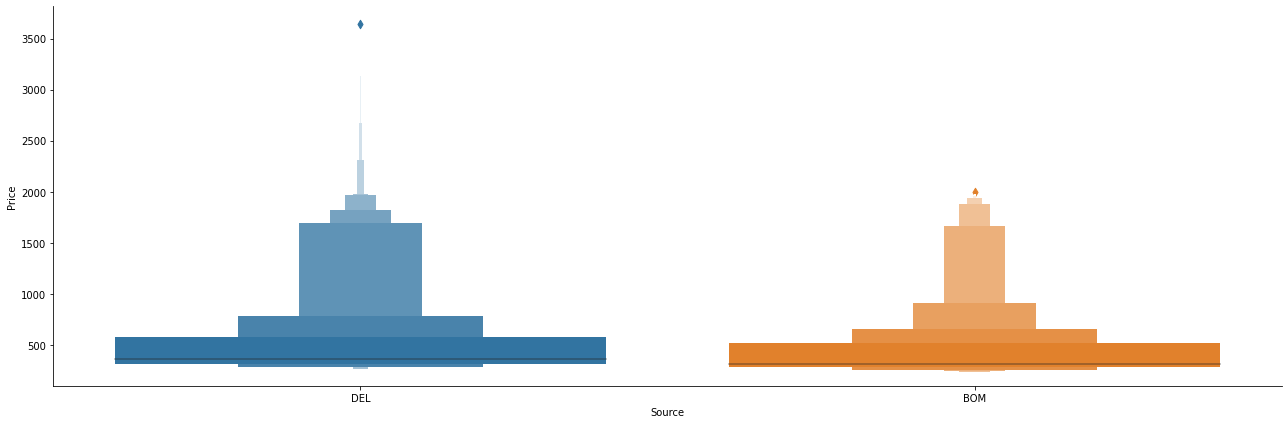

In [16]:
# source vs price
sns.catplot(y = "Price", x= "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)

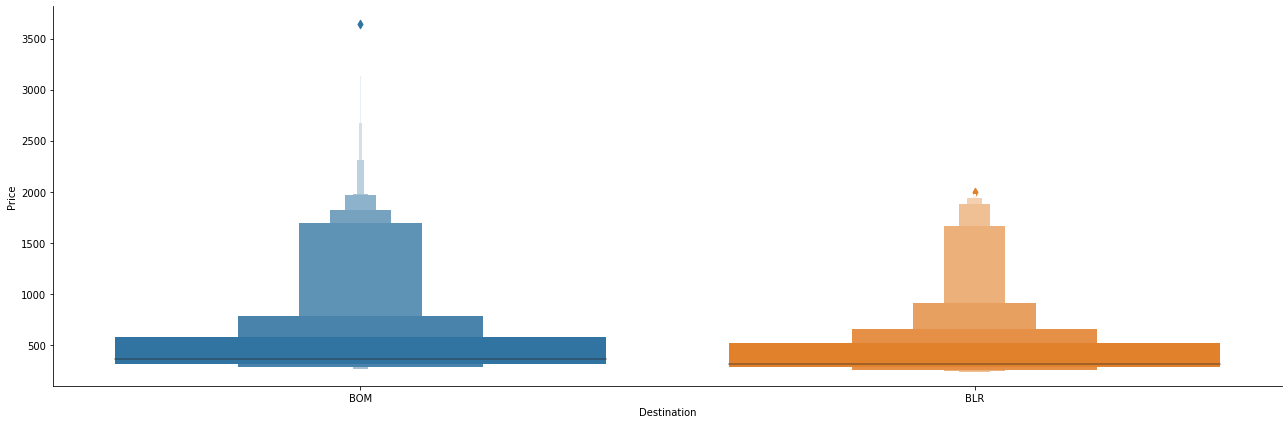

In [17]:
# source vs price
sns.catplot(y = "Price", x= "Destination", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)

In [18]:
# Total stops
print(data["Total stops"].value_counts())
data["Total stops"].unique()

nonstop     944
1 stop      902
2 stops       2
Name: Total stops, dtype: int64


array(['nonstop ', '1 stop ', '2 stops '], dtype=object)

In [19]:
# Performing LabelEncoder on Total stops since it's ordinal categorical data
data.replace({"nonstop ":0, "1 stop ": 1, "2 stops ": 2, "3 stops ":3}, inplace=True)

In [20]:
data

,Airline,Source,Destination,Duration,Total stops,Price,Date
0,Air India,DEL,BOM,2h 05m,0,423,2022-04-01
1,Vistara,DEL,BOM,2h 00m,0,360,2022-04-01
2,SpiceJet,DEL,BOM,2h 15m,0,320,2022-04-01
3,Air India,DEL,BOM,2h 05m,0,358,2022-04-01
4,Air India,DEL,BOM,2h 10m,0,358,2022-04-01
...,...,...,...,...,...,...,...
1843,SpiceJet,BOM,BLR,6h 55m,1,1909,2022-04-10
1844,SpiceJet,BOM,BLR,6h 55m,1,1943,2022-04-10
1845,Vistara,BOM,BLR,6h 25m,1,732,2022-04-10
1846,Vistara,BOM,BLR,6h 55m,1,732,2022-04-10


In [21]:
# Performing LabelEncoder on Source and Destination since it's ordinal categorical data
data.replace({"DEL":1, "BOM": 2, "BLR": 3}, inplace=True)

In [22]:
# Correlation of dataset
corr = data.corr()
corr

,Source,Destination,Total stops,Price
Source,1.000000,1.000000,0.077416,-0.110924
Destination,1.000000,1.000000,0.077416,-0.110924
Total stops,0.077416,0.077416,1.000000,0.417396
Price,-0.110924,-0.110924,0.417396,1.000000


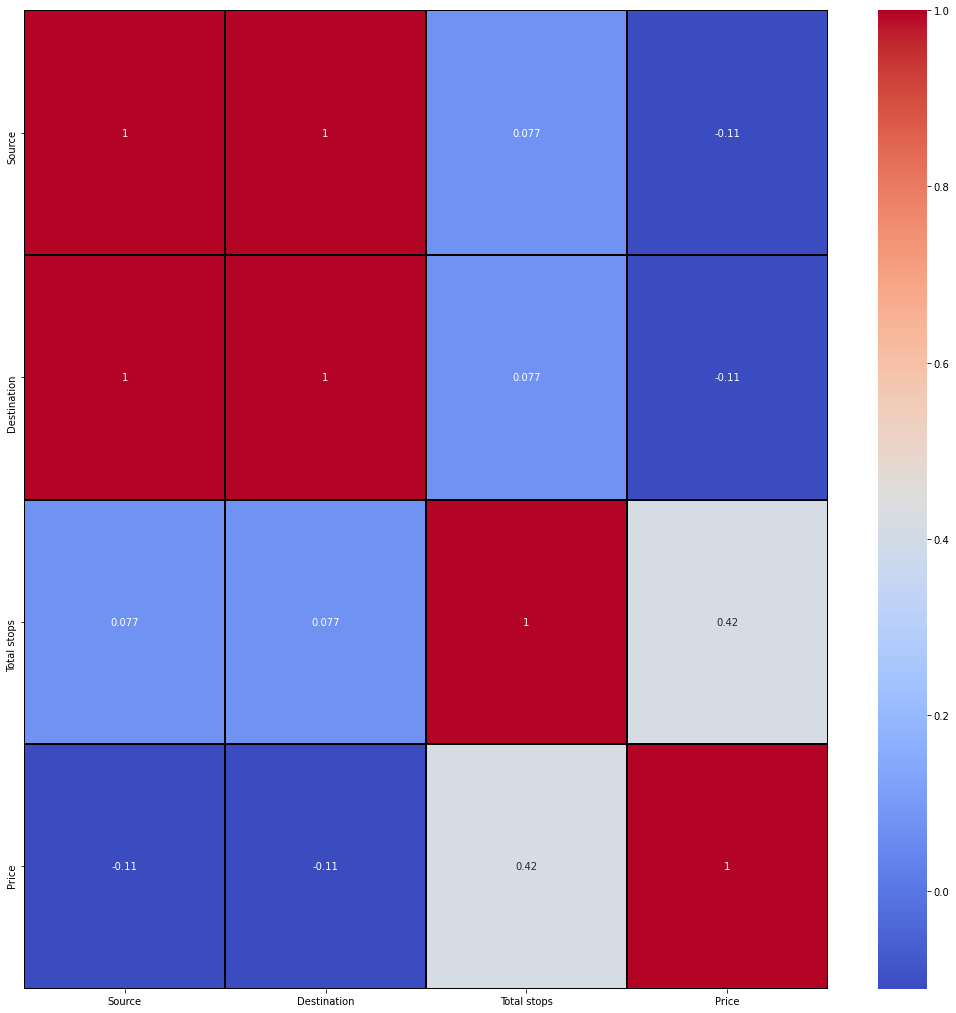

In [23]:
# Heat map
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(),annot= True, cmap = "coolwarm", linewidths=2, linecolor='black')
plt.show()

In [24]:
# Delete unnecessary columns
data.drop(columns=['Airline', 'Duration'], axis=1, inplace= True)

In [25]:
data.drop(columns=['Date'], axis=1, inplace= True)

In [26]:
data.dtypes

Source         int64
Destination    int64
Total stops    int64
Price          int32
dtype: object

In [27]:
# Statistical summary
data.describe()

,Source,Destination,Total stops,Price
count,1848.000000,1848.000000,1848.000000,1848.000000
mean,1.396104,2.396104,0.490260,503.931277
std,0.489219,0.489219,0.502201,399.231634
min,1.000000,2.000000,0.000000,239.000000
25%,1.000000,2.000000,0.000000,300.750000
50%,1.000000,2.000000,0.000000,358.000000
75%,2.000000,3.000000,1.000000,553.000000
max,2.000000,3.000000,2.000000,3646.000000


## Building the model

In [28]:
# Spliting the data
x=data.drop(columns=['Price'])
y=data['Price']

In [29]:
# Importing required metrices and model for the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [30]:
# Finding the best random state
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 45 is 0.23654321141014822


We can see that at random_state=45, the best r2_score is obtained so that we can create our train_test_split with this random state

In [31]:
# Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=.20)

## Finding the best model

In [32]:
#Importing the algorithms and other parameters
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [33]:
LR=LinearRegression()
l=Lasso()
en=ElasticNet()
rd=Ridge()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

In [34]:
models= []
models.append(('Linear Regression',LR))
models.append(('Lasso Regression',l))
models.append(('Elastic Net Regression',en))
models.append(('Ridge Regression',rd))
models.append(('Support Vector Regressor',svr))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))

In [35]:
#Importing required metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [36]:
#Finding the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
sd=[]
mae=[]
mse=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('r2_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    std=cross_val_score(model,x,y,cv=5,scoring='r2').std()
    print('Standard Deviation: ',std)
    sd.append(std)
    print('\n')
    MAE=mean_absolute_error(y_test,pre)
    print('Mean Absolute Error: ',MAE)
    mae.append(MAE)
    print('\n')
    MSE=mean_squared_error(y_test,pre)
    print('Mean Squared Error: ',MSE)
    mse.append(MSE)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

****************************** Linear Regression ***************************


LinearRegression()


r2_score:  0.23654321141014822


cross_val_score:  0.17565567782818364


Standard Deviation:  0.033797180632943895


Mean Absolute Error:  194.82158724767254


Mean Squared Error:  127969.44184450051


Root Mean Squared Error:  357.72816753018



****************************** Lasso Regression ***************************


Lasso()


r2_score:  0.23593495424579336


cross_val_score:  0.17600782151616828


Standard Deviation:  0.03282125988944436


Mean Absolute Error:  194.3651159338286


Mean Squared Error:  128071.39696623595


Root Mean Squared Error:  357.8706427834448



****************************** Elastic Net Regression ***************************


ElasticNet()


r2_score:  0.11515148796053432


cross_val_score:  0.09264820528959039


Standard Deviation:  0.012981518238482677


Mean Absolute Error:  231.2320044360901


Mean Squared Error:  148316.93410150442


Root Mean Squared 

In [37]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'r2_score': score, 'Cross_val_score':cvs, 'Standard_deviation':sd,
                    'Mean_absolute_error':mae, 'Mean_squared_error':mse, 'Root_Mean_Squared_error':rmse})
result

,Model,r2_score,Cross_val_score,Standard_deviation,Mean_absolute_error,Mean_squared_error,Root_Mean_Squared_error
0,Linear Regression,23.654321,17.565568,0.033797,194.821587,127969.441845,357.728168
1,Lasso Regression,23.593495,17.600782,0.032821,194.365116,128071.396966,357.870643
2,Elastic Net Regression,11.515149,9.264821,0.012982,231.232004,148316.934102,385.119376
3,Ridge Regression,23.634759,17.598175,0.033219,194.810450,128002.231897,357.773996
4,Support Vector Regressor,-3.382130,-4.287826,0.057896,191.100593,173287.522285,416.278179
5,Decision Tree Regressor,24.009448,18.528796,0.029293,189.520256,127374.184435,356.895201
6,KNeighbors Regressor,25.462091,-26.090340,0.509888,192.296216,124939.285838,353.467517


## Random Forest Regressor

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=45)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500]}
grid=GridSearchCV(rfr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'n_estimators': 500}
0.17860490876552895


In [39]:
#Using the best parameters obtained
RF=RandomForestRegressor(random_state=45, n_estimators=500)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('r2_score: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(RF,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  24.00320074815504
Cross validation score:  18.526219902836218
Standard deviation:  0.029231520728342533


Mean absolute error:  189.64271752303043
Mean squared error:  127384.65526241872
Root Mean squared error:  356.9098699425651


## AdaBoost Regressor

In [40]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor(random_state=45)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500,1000],'learning_rate':[0.001,0.01,0.1,1],'loss':['linear','square']}
grid=GridSearchCV(adr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'learning_rate': 0.001, 'loss': 'square', 'n_estimators': 10}
0.17969291732861664


In [41]:
#Using the best parameters obtained
adr=AdaBoostRegressor(random_state=45, n_estimators=10, learning_rate=0.001, loss='square')
adr.fit(x_train,y_train)
pred=adr.predict(x_test)
print("r2_score: ",r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(adr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(adr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  24.154324757773715
Cross validation score:  18.327966451471916
Standard deviation:  0.030664556146517235


Mean absolute error:  189.35788847630187
Mean squared error:  127131.34354328494
Root Mean squared error:  356.55482543822757


## Gradient Boosting Regressor

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=45)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500,1000]}
grid=GridSearchCV(gbr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'n_estimators': 50}
0.17906121566431718


In [43]:
#Using the best parameters obtained
gbr=GradientBoostingRegressor(random_state=45, n_estimators=50)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("r2_score: ",r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  23.9744123114883
Cross validation score:  18.53543091791307
Standard deviation:  0.02944319735328972


Mean absolute error:  189.67122771887713
Mean squared error:  127432.90999309735
Root Mean squared error:  356.9774642650392


We can see that Random Forest Regressor and KNeighbors Regressor are performing well compared to other algorithms. Now we will try Hyperparameter Tuning to find out the best parameters and try to increase the scores.

## Hyperparameter Tuning

In [44]:
# Creating parameter list to pass in GridSearchCV
parameters={'criterion':['mse','mae'],'n_estimators':[50,100,500],'max_features':['auto','sqrt','log2']}

In [45]:
# Using GridSearchCV to run the parameters and checking final accuracy
rf=RandomForestRegressor()
grid=GridSearchCV(rf,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)   
print(grid.best_score_)  

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 50}
0.17945916883561358


In [46]:
# Using the best parameters obtained
RF=RandomForestRegressor(random_state=45, n_estimators=50, criterion='mse', max_features='auto')
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('r2_score: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(RF,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred))) 

r2_score:  23.959960836089834
Cross validation score:  18.46870003501898
Standard deviation:  0.028778886504331264


Mean absolute error:  189.6600444912149
Mean squared error:  127457.13333184042
Root Mean squared error:  357.0113910393342


After applying Hyperparameter Tuning, we can see that RandomForestRegressor improve acuuracy r2_score slightly decreased. Now we will finalize the model.

## Finalizing the model

In [47]:
rf_prediction=RF.predict(x)
print('Predictions of Random Forest Regressor: ',rf_prediction)

Predictions of Random Forest Regressor:  [359.67618147 359.67618147 359.67618147 ... 544.06711797 544.06711797
 544.06711797]


In [48]:
# Saving the model
import pickle
filename='Flight_Price_Project.pkl'   #Specifying the filename
pickle.dump(RF,open(filename,'wb'))

In [49]:
# Saving the predicted values
results=pd.DataFrame(rf_prediction)
results.to_csv('Flight_Price_Prediction_Results.csv')